<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D0F5A9;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Comprehensive Lung Cancer  <br>
    (EDA / ML, DL)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Comprehensive Lung Cancer Dataset</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Survival_Years

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# For Machine Learning Model (Regression)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# # For Machine Learning Model (Classifier)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/kaggle/input/comprehensive-lung-cancer-dataset/lung_cancer_data.csv')
df.head()

,Patient_ID,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,Residential_Area,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
0,1,69,Male,Never,30,3,False,Farmer,False,Urban,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
1,2,32,Female,Former,6,61,False,Office Worker,False,Urban,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
2,3,89,Male,Never,2,9,True,Office Worker,True,Rural,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
3,4,78,Female,Never,11,69,False,Factory Worker,True,Urban,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
4,5,38,Male,Former,11,57,False,Farmer,False,Rural,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  object 
 3   Smoking_History            300000 non-null  object 
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  object 
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   Residential_Area           300000 non-null  object 
 10  BMI                        300000 non-null  float64
 11  Lung_Function_Test_Result  300000 non-null  float64
 12  Chest_Pain_Symptoms        300000 non-null  bool   
 13  Shortness_of_Breath        30

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,300000.0,150000.500000,86602.684716,1.0,75000.75,150000.50,225000.25,300000.0
Age,300000.0,53.450403,20.781058,18.0,35.00,53.00,71.00,89.0
Years_Smoked,300000.0,24.506443,14.432958,0.0,12.00,25.00,37.00,49.0
Pack_Years,300000.0,39.528500,23.088920,0.0,20.00,40.00,59.00,79.0
BMI,300000.0,28.008541,6.931694,16.0,22.00,28.00,34.00,40.0
Lung_Function_Test_Result,300000.0,64.954334,20.196922,30.0,47.50,64.90,82.50,100.0
Air_Quality_Index,300000.0,254.393990,141.498432,10.0,132.00,254.00,377.00,499.0
Tumor_Size_cm,300000.0,7.491391,4.323123,0.0,3.75,7.49,11.23,15.0
Survival_Years,300000.0,9.502227,5.762411,0.0,5.00,10.00,14.00,19.0
Follow_Up_Visits,300000.0,24.488040,14.434192,0.0,12.00,24.00,37.00,49.0


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,300000,3,Female,144104
Smoking_History,300000,3,Never,119958
Occupation,300000,4,Office Worker,120051
Residential_Area,300000,3,Urban,150087
Physical_Activity_Level,300000,3,Low,149919
Dietary_Habits,300000,3,Poor,120147
Comorbidities,209624,3,COPD,89721
Stage_of_Cancer,300000,4,III,89660
Treatment_Type,300000,4,Chemotherapy,119876
Medication_Response,300000,3,Good,150093


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Patient_ID                    0.000000
Age                           0.000000
Gender                        0.000000
Smoking_History               0.000000
Years_Smoked                  0.000000
Pack_Years                    0.000000
Family_History_Cancer         0.000000
Occupation                    0.000000
Exposure_to_Toxins            0.000000
Residential_Area              0.000000
BMI                           0.000000
Lung_Function_Test_Result     0.000000
Chest_Pain_Symptoms           0.000000
Shortness_of_Breath           0.000000
Chronic_Cough                 0.000000
Weight_Loss                   0.000000
Physical_Activity_Level       0.000000
Dietary_Habits                0.000000
Air_Quality_Index             0.000000
Comorbidities                30.125333
Previous_Cancer_Diagnosis     0.000000
Tumor_Size_cm                 0.000000
Metastasis_Status             0.000000
Stage_of_Cancer               0.000000
Treatment_Type                0.000000
Surviva

In [7]:
df['Comorbidities'].unique()

array([nan, 'COPD', 'Diabetes', 'Hypertension'], dtype=object)

### In my opinion, the missing value means 'none'.

In [8]:
df['Comorbidities'] = df['Comorbidities'].fillna('nan')
df['Comorbidities'].unique()

array(['nan', 'COPD', 'Diabetes', 'Hypertension'], dtype=object)

In [9]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

if outliers.empty:
    print("No outliers")
else:
    outliers

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

<Figure size 1000x600 with 0 Axes>

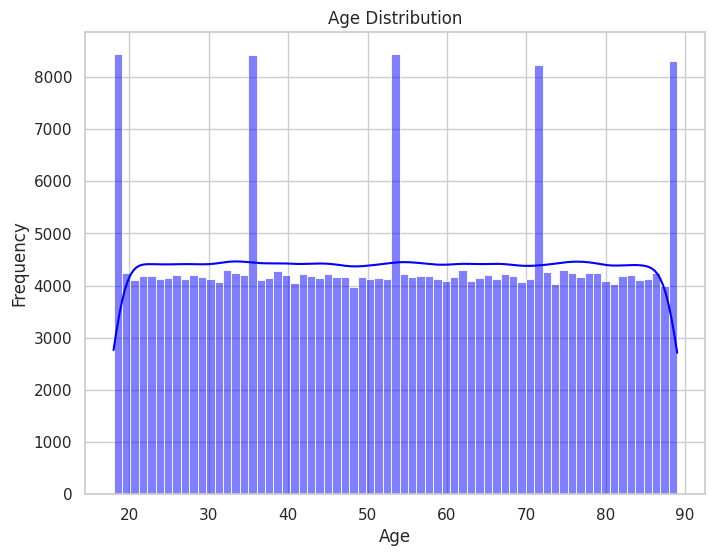

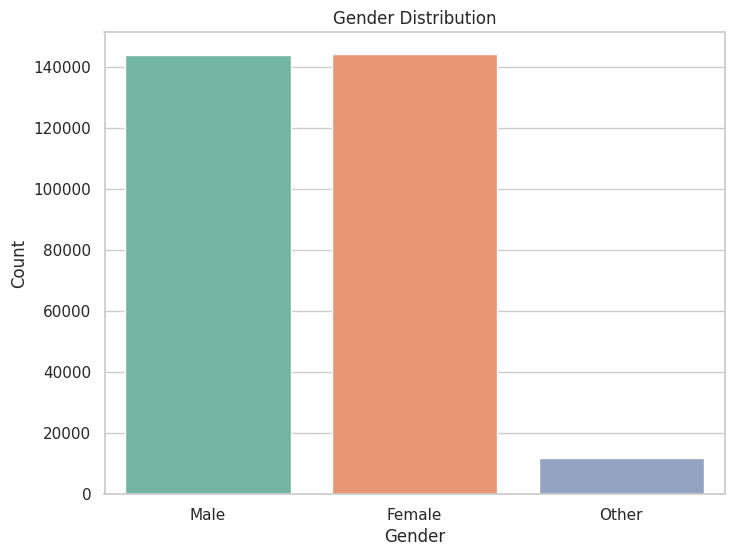

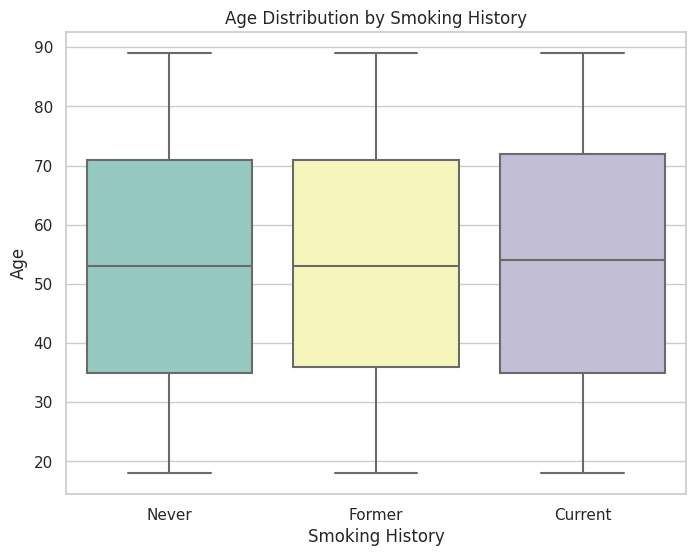

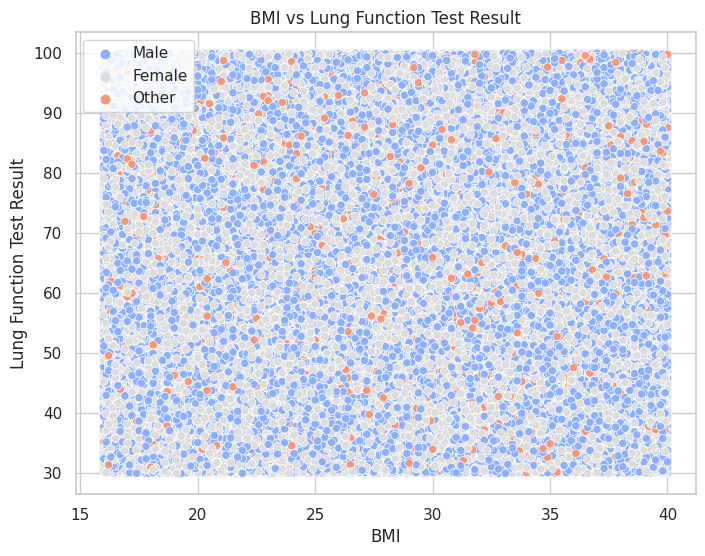

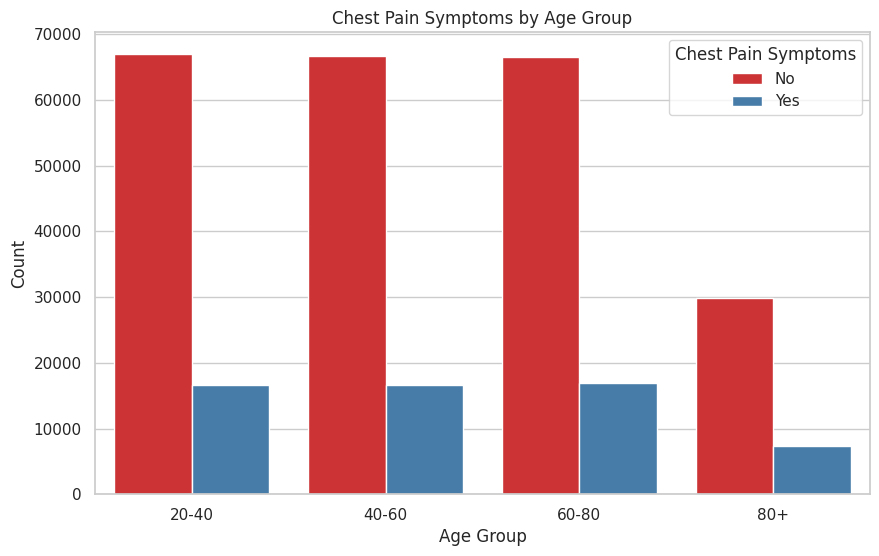

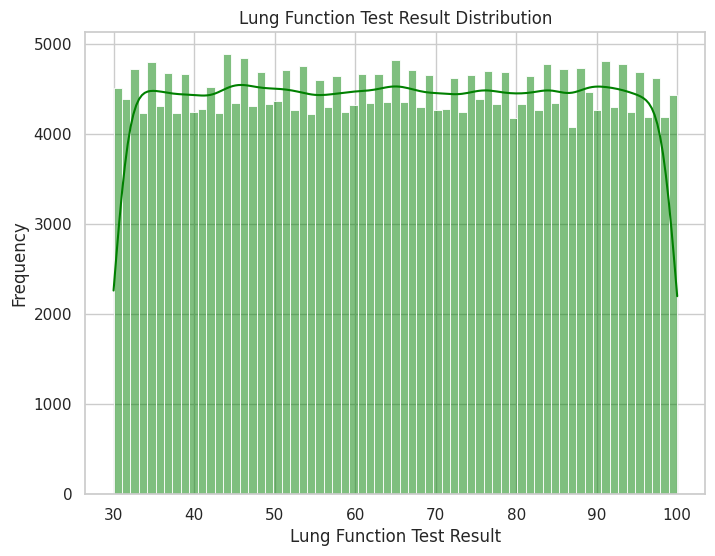

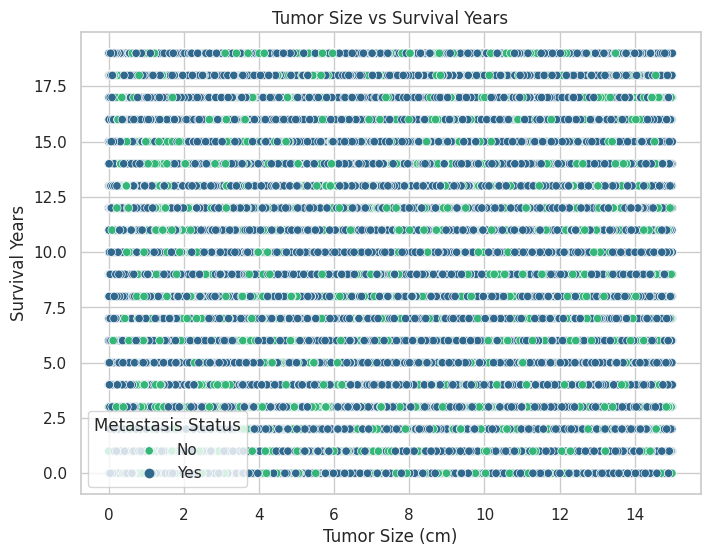

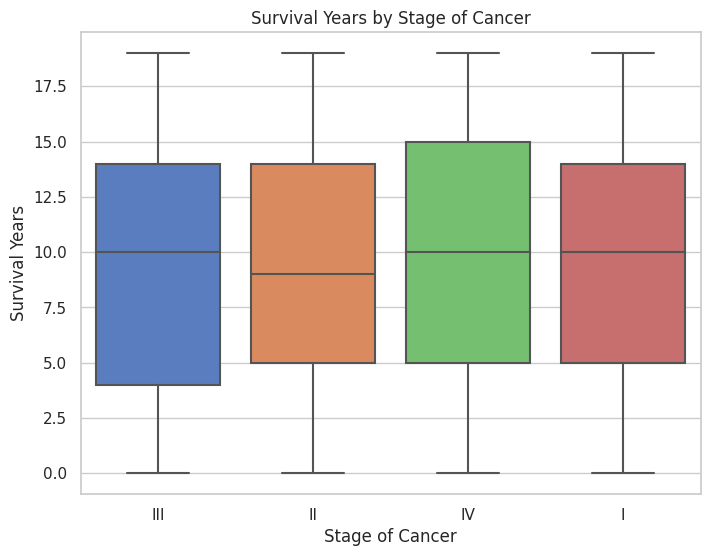

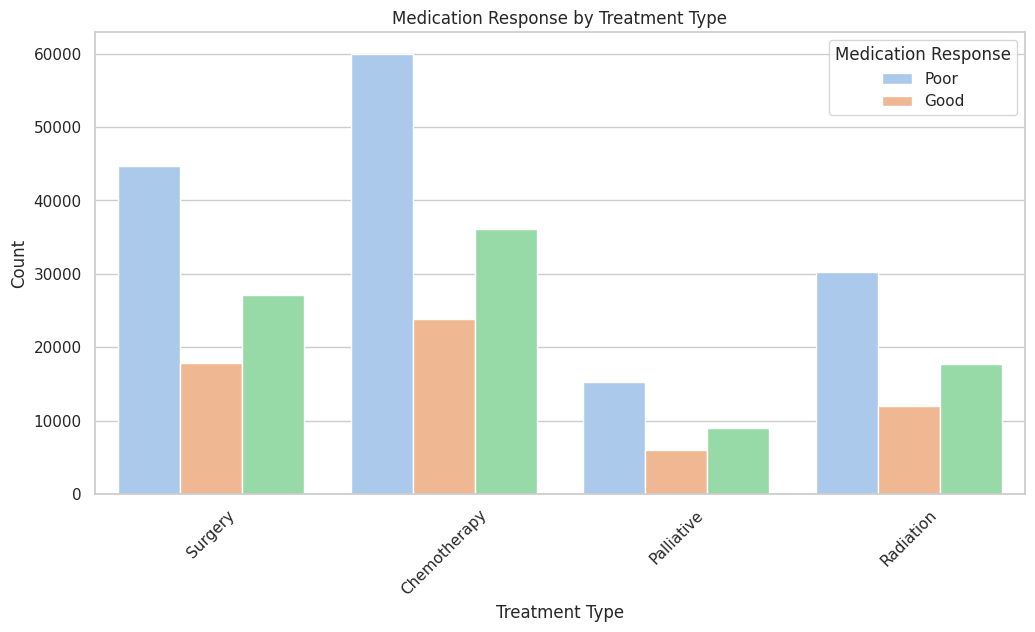

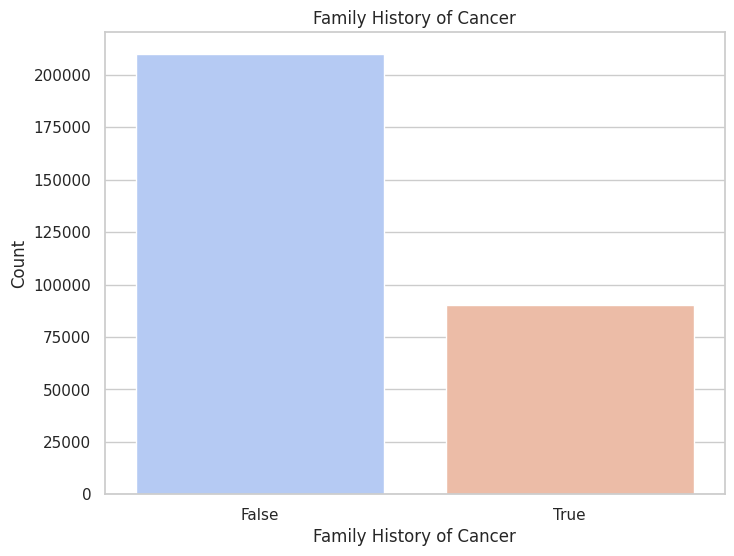

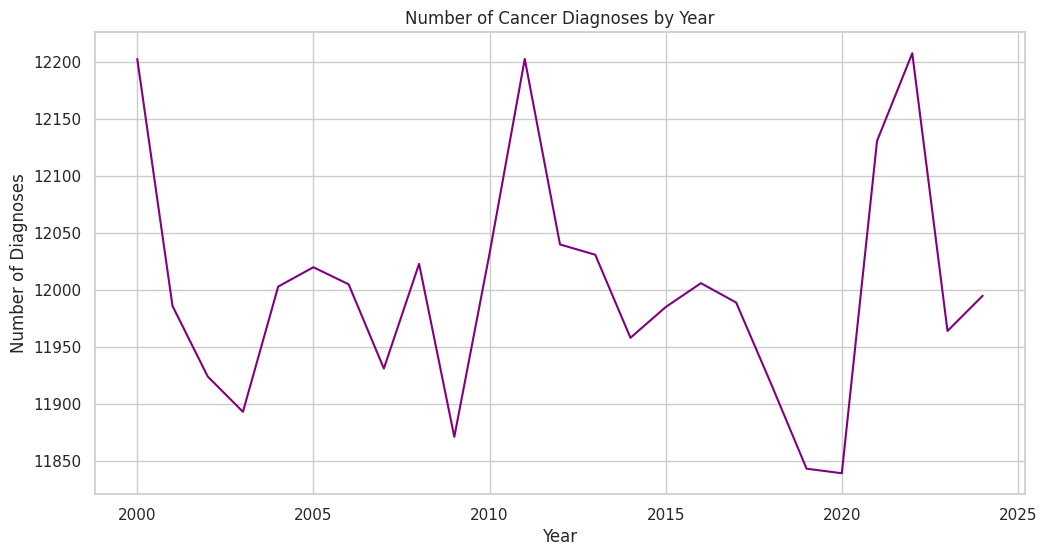

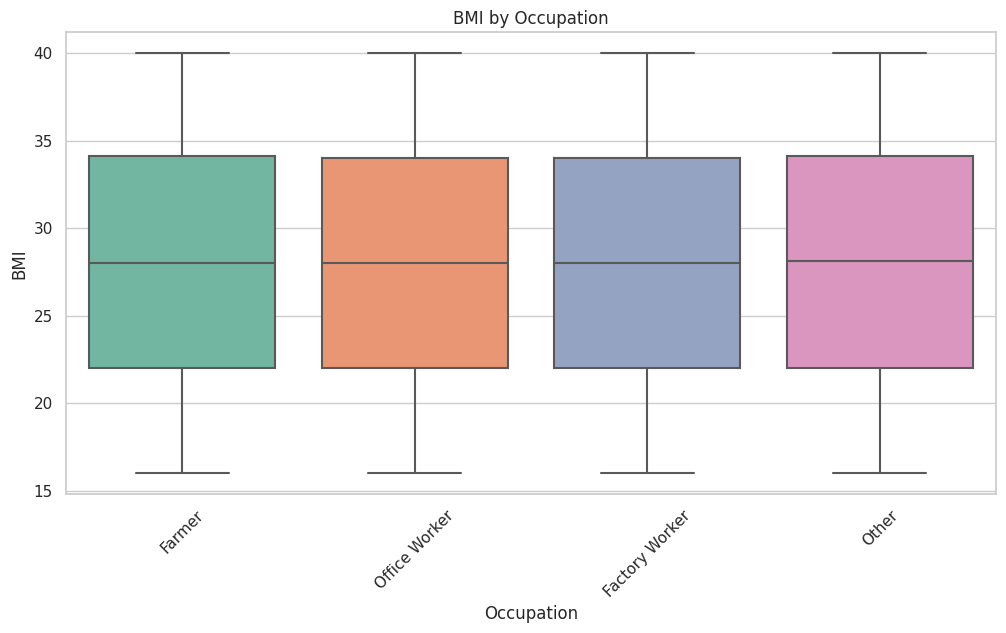

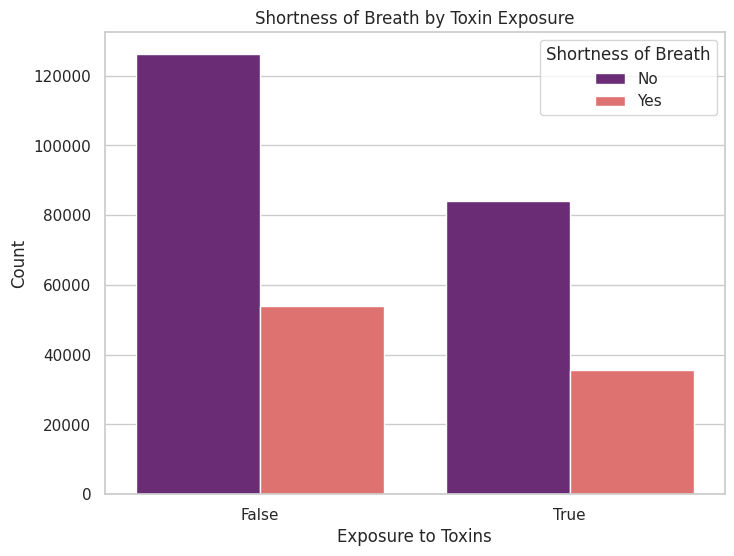

In [10]:
# Set basic configurations
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Bar plot for Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Box plot for Age distribution by Smoking History
plt.figure(figsize=(8, 6))
sns.boxplot(x='Smoking_History', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Age')
plt.show()

# 4. Scatter plot for BMI vs Lung Function Test Result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Lung_Function_Test_Result', data=df, hue='Gender', palette='coolwarm')
plt.title('BMI vs Lung Function Test Result')
plt.xlabel('BMI')
plt.ylabel('Lung Function Test Result')
plt.legend()
plt.show()

# 5. Chest Pain Symptoms count by Age Group
plt.figure(figsize=(10, 6))
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80, 100], labels=['20-40', '40-60', '60-80', '80+'])
sns.countplot(x='Age_Group', hue='Chest_Pain_Symptoms', data=df, palette='Set1')
plt.title('Chest Pain Symptoms by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Chest Pain Symptoms', labels=['No', 'Yes'])
plt.show()

# 6. Histogram for Lung Function Test Result distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Lung_Function_Test_Result'], kde=True, color='green')
plt.title('Lung Function Test Result Distribution')
plt.xlabel('Lung Function Test Result')
plt.ylabel('Frequency')
plt.show()

# 7. Scatter plot for Tumor Size vs Survival Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tumor_Size_cm', y='Survival_Years', data=df, hue='Metastasis_Status', palette='viridis')
plt.title('Tumor Size vs Survival Years')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Survival Years')
plt.legend(title='Metastasis Status', labels=['No', 'Yes'])
plt.show()

# 8. Box plot for Survival Years by Stage of Cancer
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage_of_Cancer', y='Survival_Years', data=df, palette='muted')
plt.title('Survival Years by Stage of Cancer')
plt.xlabel('Stage of Cancer')
plt.ylabel('Survival Years')
plt.show()

# 9. Count plot for Medication Response by Treatment Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Treatment_Type', hue='Medication_Response', data=df, palette='pastel')
plt.title('Medication Response by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.legend(title='Medication Response', labels=['Poor', 'Good'])
plt.xticks(rotation=45)
plt.show()

# 10. Bar plot for Family History of Cancer
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_History_Cancer', data=df, palette='coolwarm')
plt.title('Family History of Cancer')
plt.xlabel('Family History of Cancer')
plt.ylabel('Count')
plt.show()

# 11. Line plot for Yearly Cancer Diagnosis trend
plt.figure(figsize=(12, 6))
df['Year_of_Diagnosis'] = pd.to_datetime(df['Year_of_Diagnosis'], format='%Y')
df.groupby(df['Year_of_Diagnosis'].dt.year).size().plot(kind='line', color='purple')
plt.title('Number of Cancer Diagnoses by Year')
plt.xlabel('Year')
plt.ylabel('Number of Diagnoses')
plt.show()

# 12. Box plot for BMI by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='BMI', data=df, palette='Set2')
plt.title('BMI by Occupation')
plt.xlabel('Occupation')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

# 13. Count plot for Shortness of Breath by Toxin Exposure
plt.figure(figsize=(8, 6))
sns.countplot(x='Exposure_to_Toxins', hue='Shortness_of_Breath', data=df, palette='magma')
plt.title('Shortness of Breath by Toxin Exposure')
plt.xlabel('Exposure to Toxins')
plt.ylabel('Count')
plt.legend(title='Shortness of Breath', labels=['No', 'Yes'])
plt.show()


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

In [11]:
df = df.drop(columns=['Patient_ID', 'Year_of_Diagnosis', 'Age_Group'])

encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

print("Converted DataFrame:")

df.info()

Converted DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        300000 non-null  int64  
 1   Gender                     300000 non-null  int64  
 2   Smoking_History            300000 non-null  int64  
 3   Years_Smoked               300000 non-null  int64  
 4   Pack_Years                 300000 non-null  int64  
 5   Family_History_Cancer      300000 non-null  bool   
 6   Occupation                 300000 non-null  int64  
 7   Exposure_to_Toxins         300000 non-null  bool   
 8   Residential_Area           300000 non-null  int64  
 9   BMI                        300000 non-null  float64
 10  Lung_Function_Test_Result  300000 non-null  float64
 11  Chest_Pain_Symptoms        300000 non-null  bool   
 12  Shortness_of_Breath        300000 non-null  bool   
 13  Chronic_

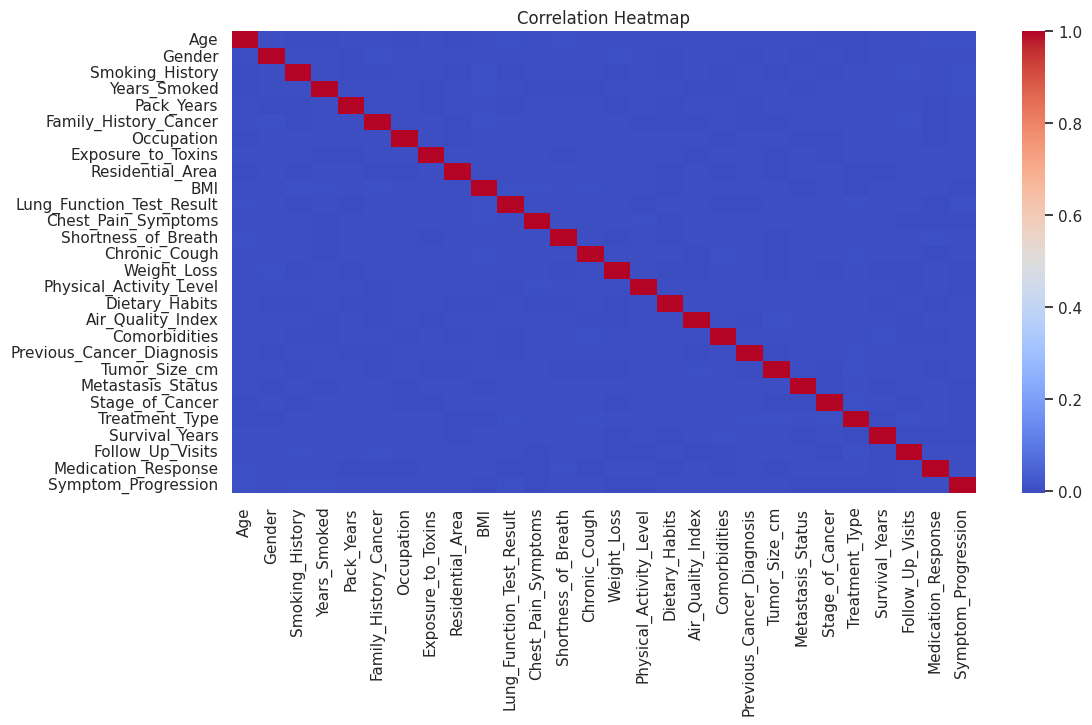

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of model performance : Machine Learning</div>

In [13]:
X = df.drop('Survival_Years', axis=1)
y = df['Survival_Years']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
#    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
#    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
#    "KNN": KNeighborsRegressor(n_neighbors=3),
#    "Decision Tree": DecisionTreeRegressor(random_state=42),
#    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
#    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [14]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Linear Regression,33.354878,-0.000191
Polynomial Regression,33.412418,-0.001916
XGBoost,33.819757,-0.014131


### This is an incorrect model analysis because the R2 value is negative, so I change it to a classification model.

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
#    "KNN": KNeighborsClassifier(n_neighbors=3),
#    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [16]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.050667,0.051408,0.050667,0.047229
1,XGBoost,0.049667,0.049543,0.049667,0.049527


### The performance of the classification model seems to be worse than that of the regression model.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of model performance : Deep Learning</div>

In [17]:
# Single Neural Network Model
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

nn_history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

nn_pred = nn_model.predict(X_test).flatten()
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

print(f"Single Neural Network (NN) - MSE: {nn_mse:.4f}, R2: {nn_r2:.4f}")

Epoch 1/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 40.5772 - mae: 5.3253 - val_loss: 37.7010 - val_mae: 5.2178
Epoch 2/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 34.5507 - mae: 5.0575 - val_loss: 34.0167 - val_mae: 5.0252
Epoch 3/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 33.8736 - mae: 5.0342 - val_loss: 33.0131 - val_mae: 4.9740
Epoch 4/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 33.3196 - mae: 4.9982 - val_loss: 33.0122 - val_mae: 4.9747
Epoch 5/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 33.3188 - mae: 5.0029 - val_loss: 33.0092 - val_mae: 4.9745
Epoch 6/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 33.2048 - mae: 4.9904 - val_loss: 33.0215 - val_mae: 4.9749
Epoch 7/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 33.2876 - mae: 5.0000 - val_loss: 33.0380 - val_mae: 4.9751
Epoch 8/50
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 33.2613 - mae: 5.0008 - val_loss: 33.0556 - val_mae: 4.9754
Epoch 9/50
6000/

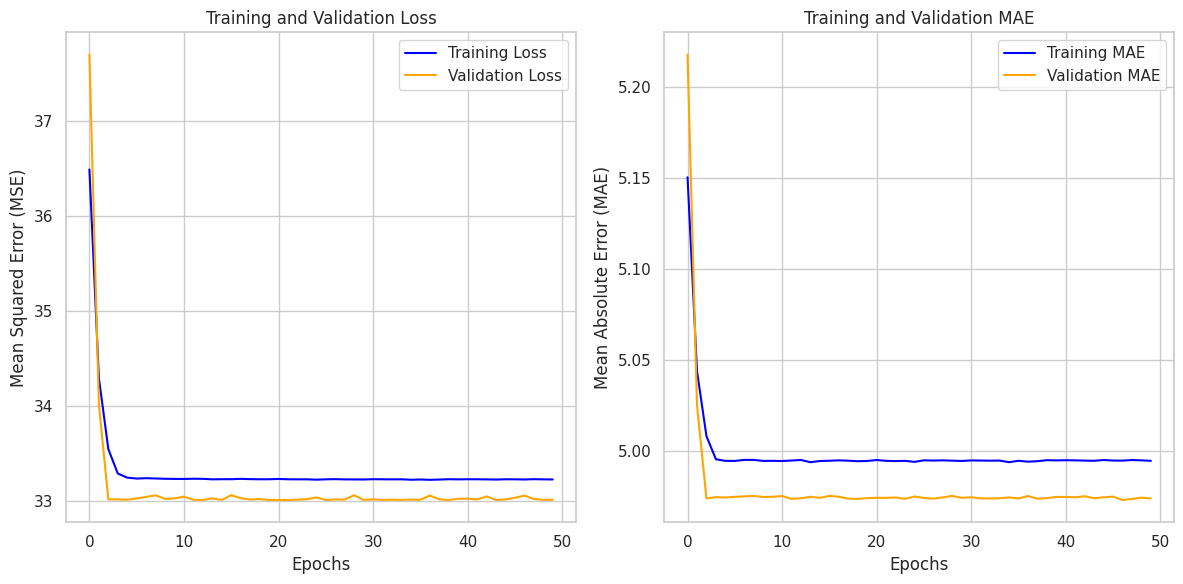

In [18]:
# Retrieve training history
history = nn_history.history

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss', color='blue')
plt.plot(history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# Mean Absolute Error (MAE) Plot
plt.subplot(1, 2, 2)
plt.plot(history['mae'], label='Training MAE', color='blue')
plt.plot(history['val_mae'], label='Validation MAE', color='orange')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

### Survival_Years
<h3>- Regression: model is not suitable for describing data at all because R2 value is negative<br><br>
- Classification model: Since the accuracy is less than 10%, the model is not suitable for describing the data at all<br><br>
In conclusion, there is no explanatory power of independent variables to predict Survival_Years, and additional information is required.</h3>

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>